<B>Metodos de Biortogonalizacion

Sea $A$ $\varepsilon$ $C^{mxm}$ No singular, pero no necesariamente Hermitiana, entonces tenemos que $A$x=b, para cualquier b $\varepsilon$ $C^{m}$ es un sistema de ecuaciones cuadrado no singular.
Uno de los metodos mas simples para resolverlo es aplicar el metodo iterativo CG (Gradientes conjugados) a la ecuacion:
$A^{*}$$A$x=$A^{*}$b 

Dado que A es no singular, $A^{*}A$ es hermitiana definida positiva o simetrica definida positiva si A es real.

Este método se conoce con el nombre de CGN, que significa aproximadamente "CG aplicado a la ecuación normal".

<B>Para poder aplicar el metodo, repasemos el metodo de los Gradientes Conjugados



El metodo de los gradientes conjugados es el metodo original iterativo de los subespacios de Krylov, el mas famoso de estos metodos y uno de los pilares de la computacion cientifica.
Desarrollado por Hestenes ans Stiefel en 1952, resolviendo sistemas simetricos definidos positivos de ecuaciones increiblemente rapido si los autovalores estan bien distribuidos.



<b>Minimizacion de la norma A del Error

Sea $A$ $\varepsilon$ $R^{mxm}$ simetrica y definida positiva, la funcion definida por $\|.\|_{A}$ como:

$\|.\|_{A}=\sqrt{x^{T}Ax}$

es una norma en $R^{m}$

El vector cuya norma A nos interesa es $e_{n}=x_{*} - x_{n}$, el error en la iteracion n.

La iteracion de gradiente conjugado puede describirse como:
Un sistema de formulas recurrentes que genrean una unica secuencia de iteraciones ${x_{n} \varepsilon K_{n}}$ con la propiedad que al paso n, $\|e\|_{A}$ es minimo

<b>Iteracion de gradiente Conjugado:

El método de gradientes conjugados sigue un proceso iterativo que:

1. Selecciona una dirección de búsqueda conjugada.
2. Calcula el tamaño del paso en esa dirección.
3. Actualiza la solución aproximada.
4. Repite el proceso hasta que el error o el residuo sean suficientemente pequeños.




In [7]:
def conjgrad(A, b, x):
    r = b - np.dot(A, x)
    p = r
    rsold = np.dot(np.transpose(r), r)
    
    for i in range(len(b)):
        Ap = np.dot(A, p)
        alpha = rsold / np.dot(np.transpose(p), Ap)  # longitu de paso
        x = x + np.dot(alpha, p)                     # aproximacion de la solucion 
        r = r - np.dot(alpha, Ap)                    # residuo 
        rsnew = np.dot(np.transpose(r), r)           #
        if np.sqrt(rsnew) < 1e-8:
            break
        p = r + (rsnew/rsold)*p                      # direccion de busqueda
        rsold = rsnew
    return x

<b> Ejemplo
    

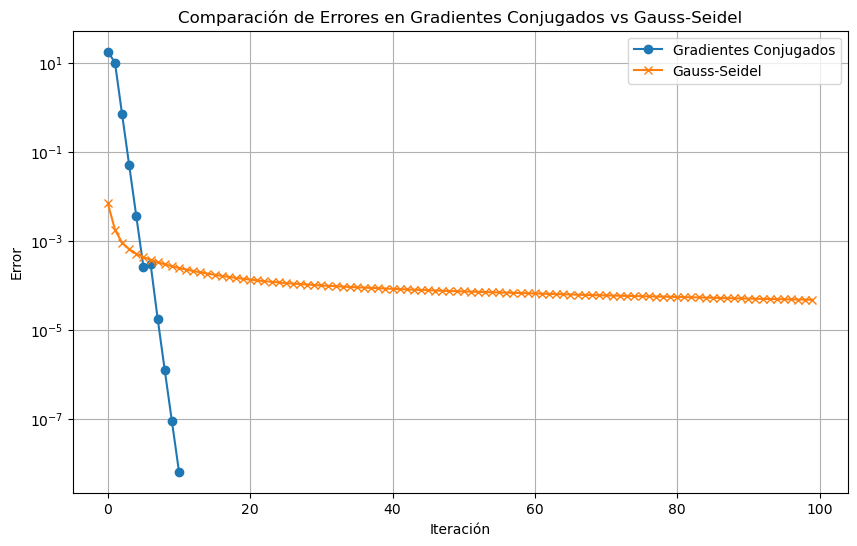

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Función de Gradientes Conjugados
def conjgrad(A, b, x):
    r = b - np.dot(A, x)
    p = r
    rsold = np.dot(r.T, r)
    errors = [np.sqrt(rsold)]
    
    for i in range(len(b)):
        Ap = np.dot(A, p)
        alpha = rsold / np.dot(p.T, Ap)
        x = x + alpha * p
        r = r - alpha * Ap
        rsnew = np.dot(r.T, r)
        errors.append(np.sqrt(rsnew))
        
        if np.sqrt(rsnew) < 1e-8:
            break
        
        p = r + (rsnew / rsold) * p
        rsold = rsnew
    
    return x, errors

# Método de Gauss-Seidel
def gauss_seidel(A, b, x, max_iter=100, tol=1e-8):
    n = len(b)
    x_new = x.copy()
    errors = []
    
    for k in range(max_iter):
        x_old = x_new.copy()
        
        for i in range(n):
            s1 = sum(A[i, j] * x_new[j] for j in range(i))
            s2 = sum(A[i, j] * x_old[j] for j in range(i + 1, n))
            x_new[i] = (b[i] - s1 - s2) / A[i, i]
        
        error = np.linalg.norm(x_new - x_old)
        errors.append(error)
        
        if error < tol:
            break
    
    return x_new, errors

# Crear un sistema de ejemplo Ax = b
np.random.seed(0)
n = 1000
A = np.random.rand(n, n)
A = np.dot(A, A.T) + n * np.eye(n)  # Hacer A simétrica y definida positiva
b = np.random.rand(n)
x0 = np.zeros(n)

# Resolver usando Gradientes Conjugados
x_cg, errors_cg = conjgrad(A, b, x0)

# Resolver usando Gauss-Seidel
x_gs, errors_gs = gauss_seidel(A, b, x0)

# Graficar errores
plt.figure(figsize=(10, 6))
plt.plot(errors_cg, label='Gradientes Conjugados', marker='o')
plt.plot(errors_gs, label='Gauss-Seidel', marker='x')
plt.yscale('log')
plt.xlabel('Iteración')
plt.ylabel('Error')
plt.title('Comparación de Errores en Gradientes Conjugados vs Gauss-Seidel')
plt.legend()
plt.grid(True)
plt.show()


<b>Ejemplo 2 

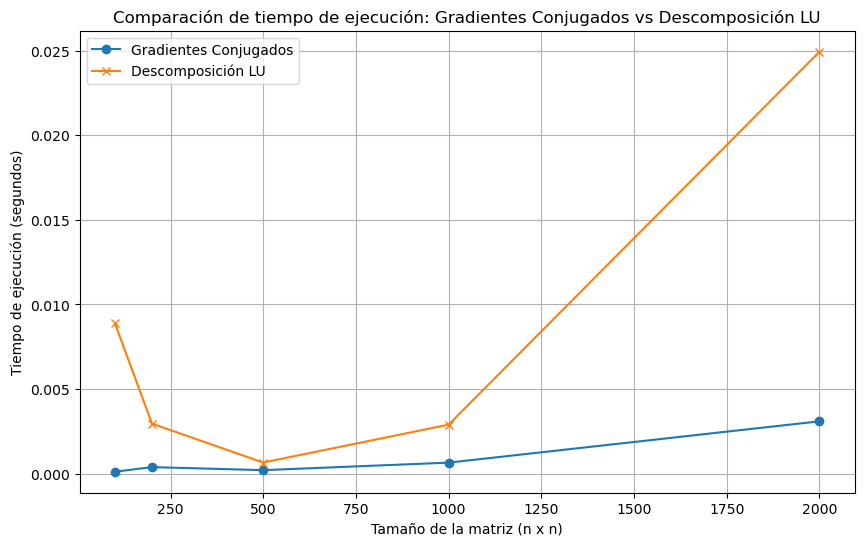

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.linalg import lu_solve, lu_factor

# Función de Gradientes Conjugados
def conjgrad(A, b, x):
    r = b - np.dot(A, x)
    p = r
    rsold = np.dot(r.T, r)
    
    for i in range(len(b)):
        Ap = np.dot(A, p)
        alpha = rsold / np.dot(p.T, Ap)
        x = x + alpha * p
        r = r - alpha * Ap
        rsnew = np.dot(r.T, r)
        
        if np.sqrt(rsnew) < 1e-8:
            break
        
        p = r + (rsnew / rsold) * p
        rsold = rsnew
    
    return x

# Configuración de los tamaños de la matriz
sizes = [100, 200, 500, 1000, 2000]  # Tamaños de matrices (n x n)
cg_times = []
lu_times = []

# Probar cada tamaño de sistema
for n in sizes:
    # Crear una matriz simétrica y definida positiva A y un vector b
    A = np.random.rand(n, n)
    A = np.dot(A, A.T) + n * np.eye(n)  # Hacer A simétrica y definida positiva
    b = np.random.rand(n)
    x0 = np.zeros(n)
    
    # Medir el tiempo de Gradientes Conjugados
    start_time = time.time()
    x_cg = conjgrad(A, b, x0)
    cg_times.append(time.time() - start_time)
    
    # Medir el tiempo de Descomposición LU
    start_time = time.time()
    lu, piv = lu_factor(A)
    x_lu = lu_solve((lu, piv), b)
    lu_times.append(time.time() - start_time)

# Graficar los tiempos de ejecución
plt.figure(figsize=(10, 6))
plt.plot(sizes, cg_times, label='Gradientes Conjugados', marker='o')
plt.plot(sizes, lu_times, label='Descomposición LU', marker='x')
plt.xlabel('Tamaño de la matriz (n x n)')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Comparación de tiempo de ejecución: Gradientes Conjugados vs Descomposición LU')
plt.legend()
plt.grid(True)
plt.show()
